This notebook creates Figure 1 in the paper. It assumes you have already computed the difference statistics (e.g. run_simulation.sh) and they are in the folder data/

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
from sklearn.externals.joblib import load, dump
from glob import glob


from affine import affine_cp_leaf_proportions
from sim_utils import get_diffstat_fname
from change_point_estimation import get_threshold, get_anchor, estimate_change_point


data_dir = '../data/many/'

# load data

In [5]:
dstat_files = glob('{}diff*'.format(data_dir))
diff_stats = []
for f in dstat_files:
    dat = load(f)
    diff_stats.append(dat['dout'][0])
    
params = dat['params']
anchor = dat['dout'][1]
R = len(dstat_files)
n = params['n']
true_cp = int(params['cp'] * params['n'])

diff_stats_one_draw = diff_stats[0]

# make plot for one rune

In [6]:
fontsize=5

Text(0.5,1,'Affine to square root')

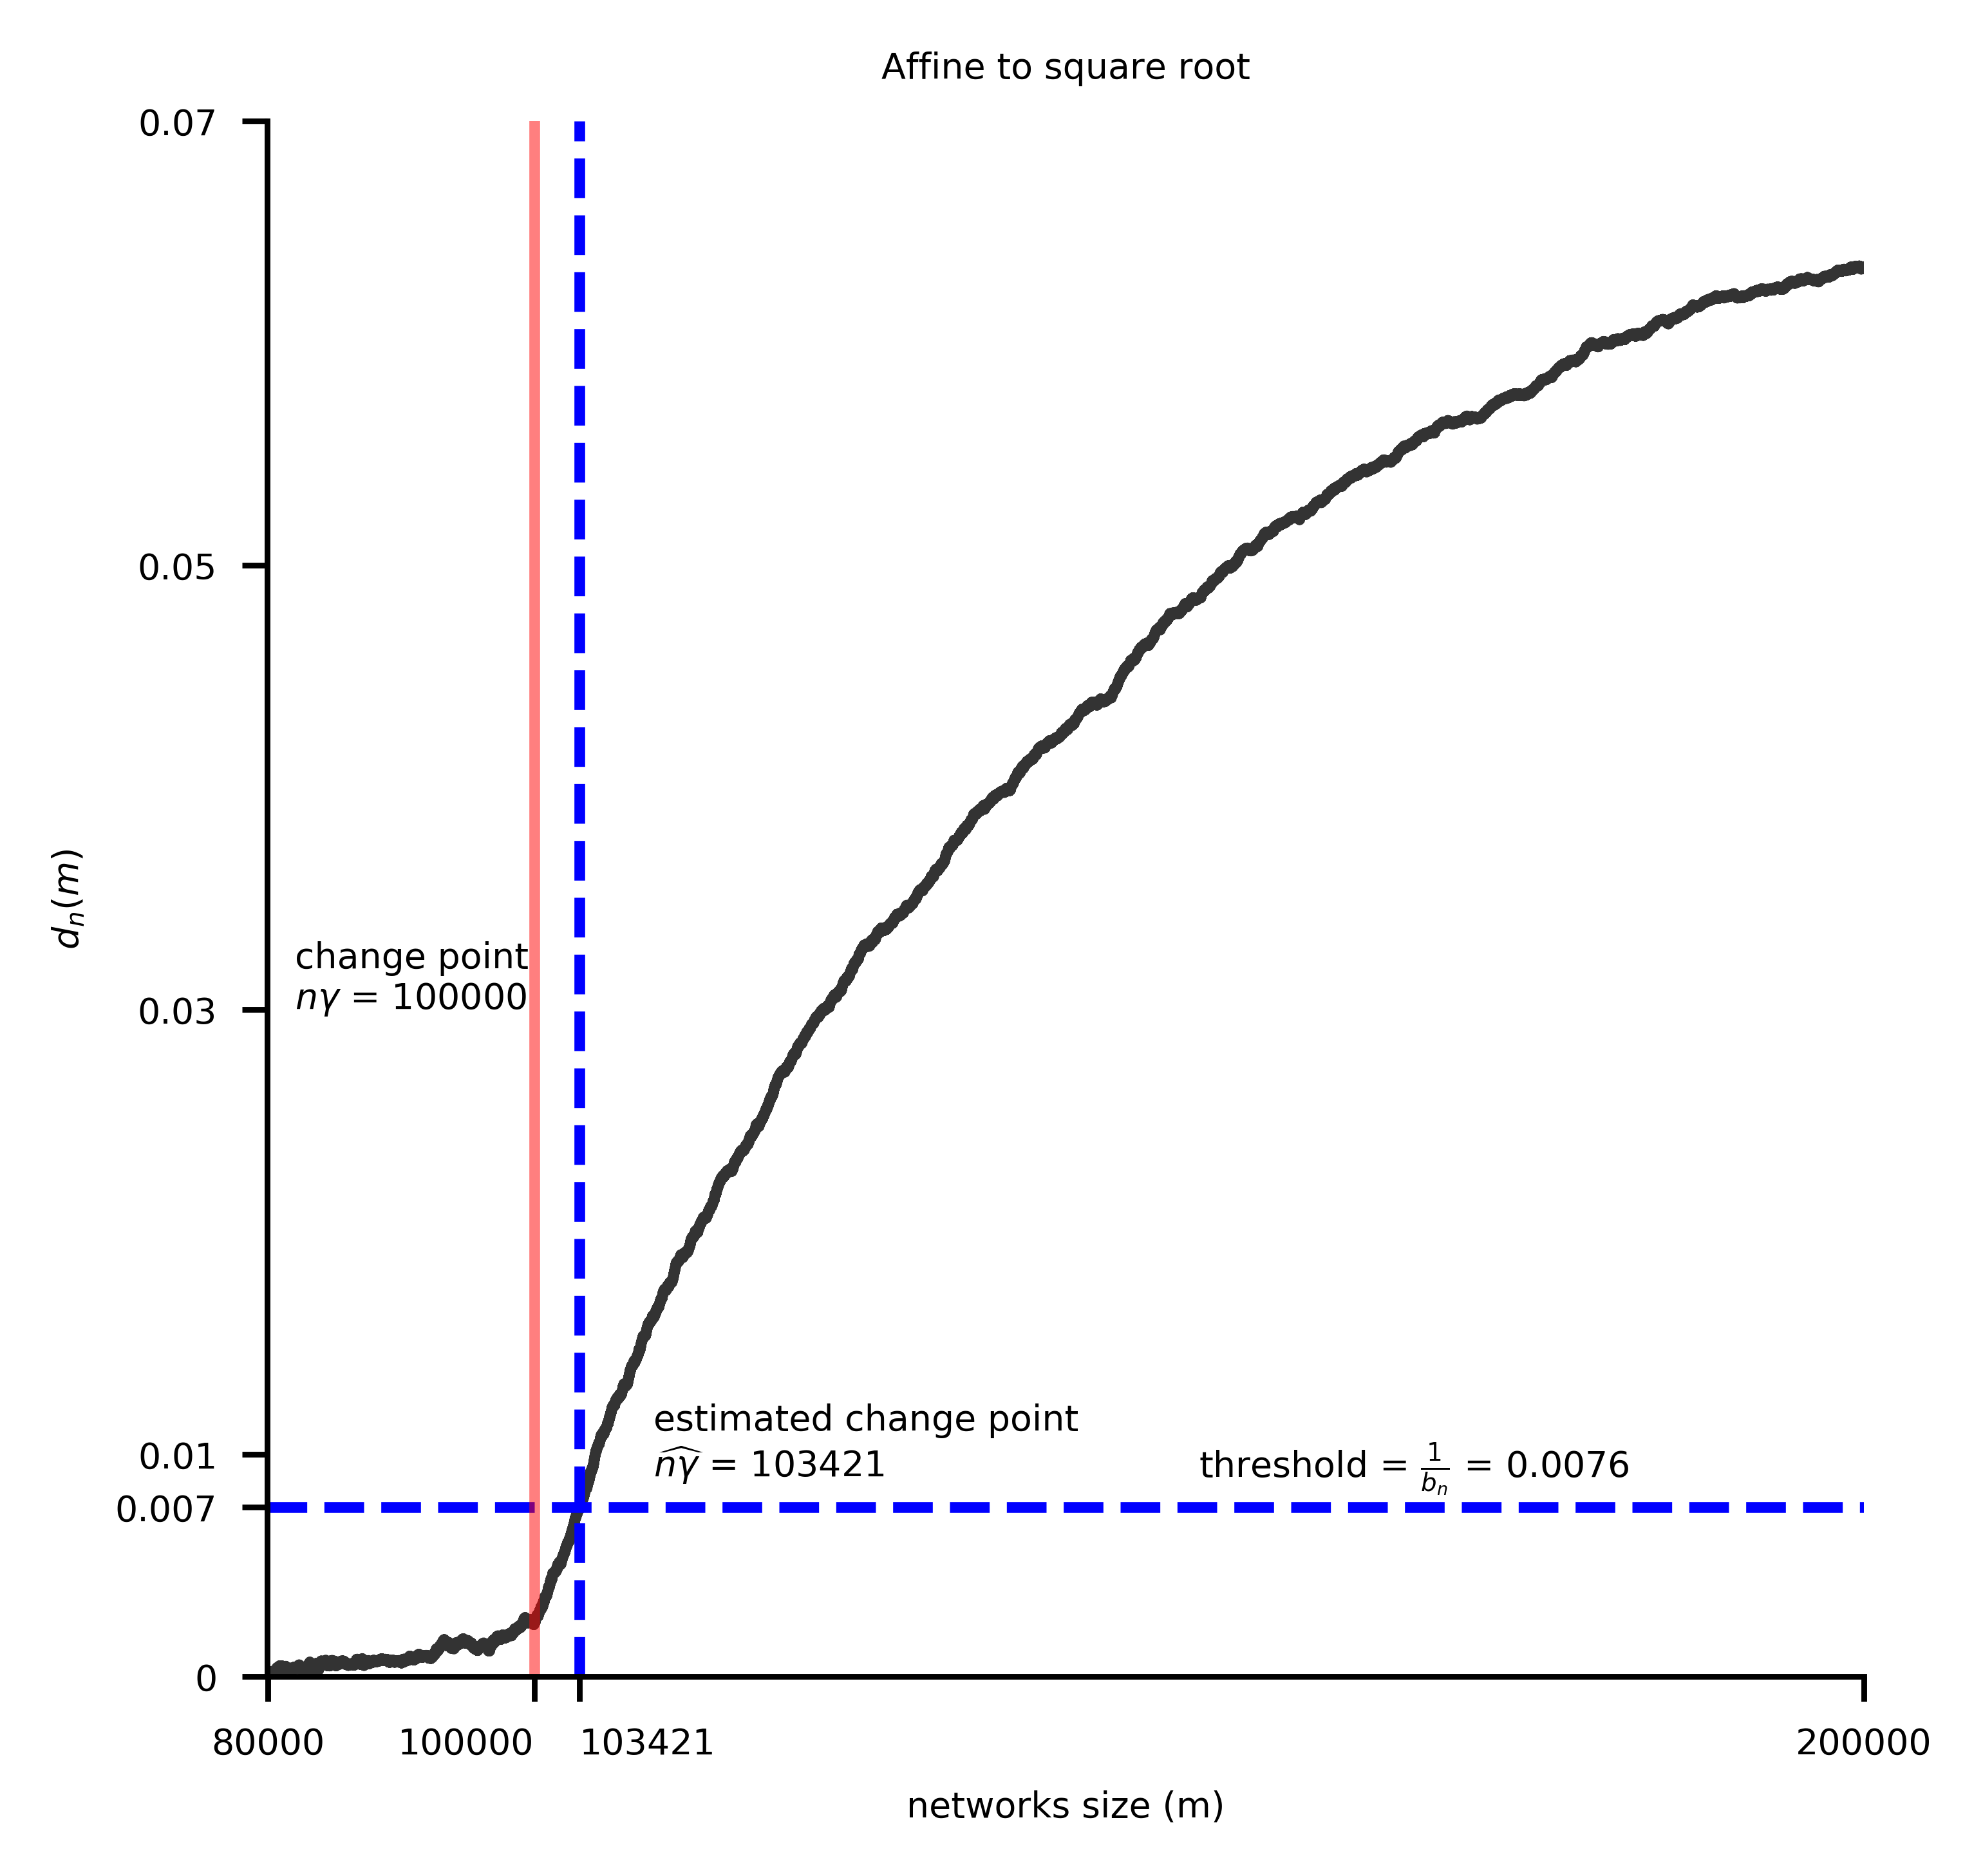

In [7]:
b = 'nto1overloglog'

fig = plt.figure(figsize=[4, 4], dpi=800)
ax = plt.axes()

threshold = get_threshold(b, n)

plt.plot(diff_stats_one_draw, color='black', alpha=.8, label='difference statistic')
plt.axhline(y=threshold, color='blue', label='threshold', linestyle='--')

plt.axvline(true_cp, label='true change point ({})'.format(true_cp), color='red', alpha=.5)

est_cp = int(estimate_change_point(diff_stats_one_draw, b=b, upcrossing='last'))
plt.axvline(x=est_cp, color='blue', label='estimated change point ({})'.format(est_cp), linestyle='--')


# x axis
xticks = [80000, 100000, est_cp, 200000]
plt.xticks(xticks, xticks, fontsize=fontsize)
ax.xaxis.get_majorticklabels()[1].set_horizontalalignment("right")
ax.xaxis.get_majorticklabels()[2].set_horizontalalignment("left")
plt.xlim(xmin=anchor, xmax=n)
plt.xlabel('networks size (m)', fontsize=fontsize)


# y axis
yticks_labels = [0, float(str(threshold)[:5]), 0.01, 0.03, 0.05, 0.07]
yticks_pos = [0, threshold, 0.01, 0.03, 0.05, 0.07]
plt.yticks(yticks_pos, yticks_labels, fontsize=fontsize)
plt.ylim(ymin=0)
plt.ylabel('$d_n(m)$', fontsize=fontsize)


# kill top/right axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.text(82000, y=0.03, s='change point\n$n\gamma$ = {}'.format(true_cp), fontsize=fontsize)
ax.text(109000, y=0.009, s='estimated change point \n$\widehat{n \gamma}$ = %d'% est_cp, fontsize=fontsize)

threshold_label = r'threshold = $\frac{1}{b_n}$ = '
threshold_label += '{:1.4f}'.format(threshold)
ax.text(150000, y=0.009, s=threshold_label, fontsize=fontsize)

plt.title('Affine to square root', fontsize=fontsize)

# plt.savefig('single_run_affine_sqrt.png')

# Summary

Text(0.5,1,'Affine to square root (100 simulations)')

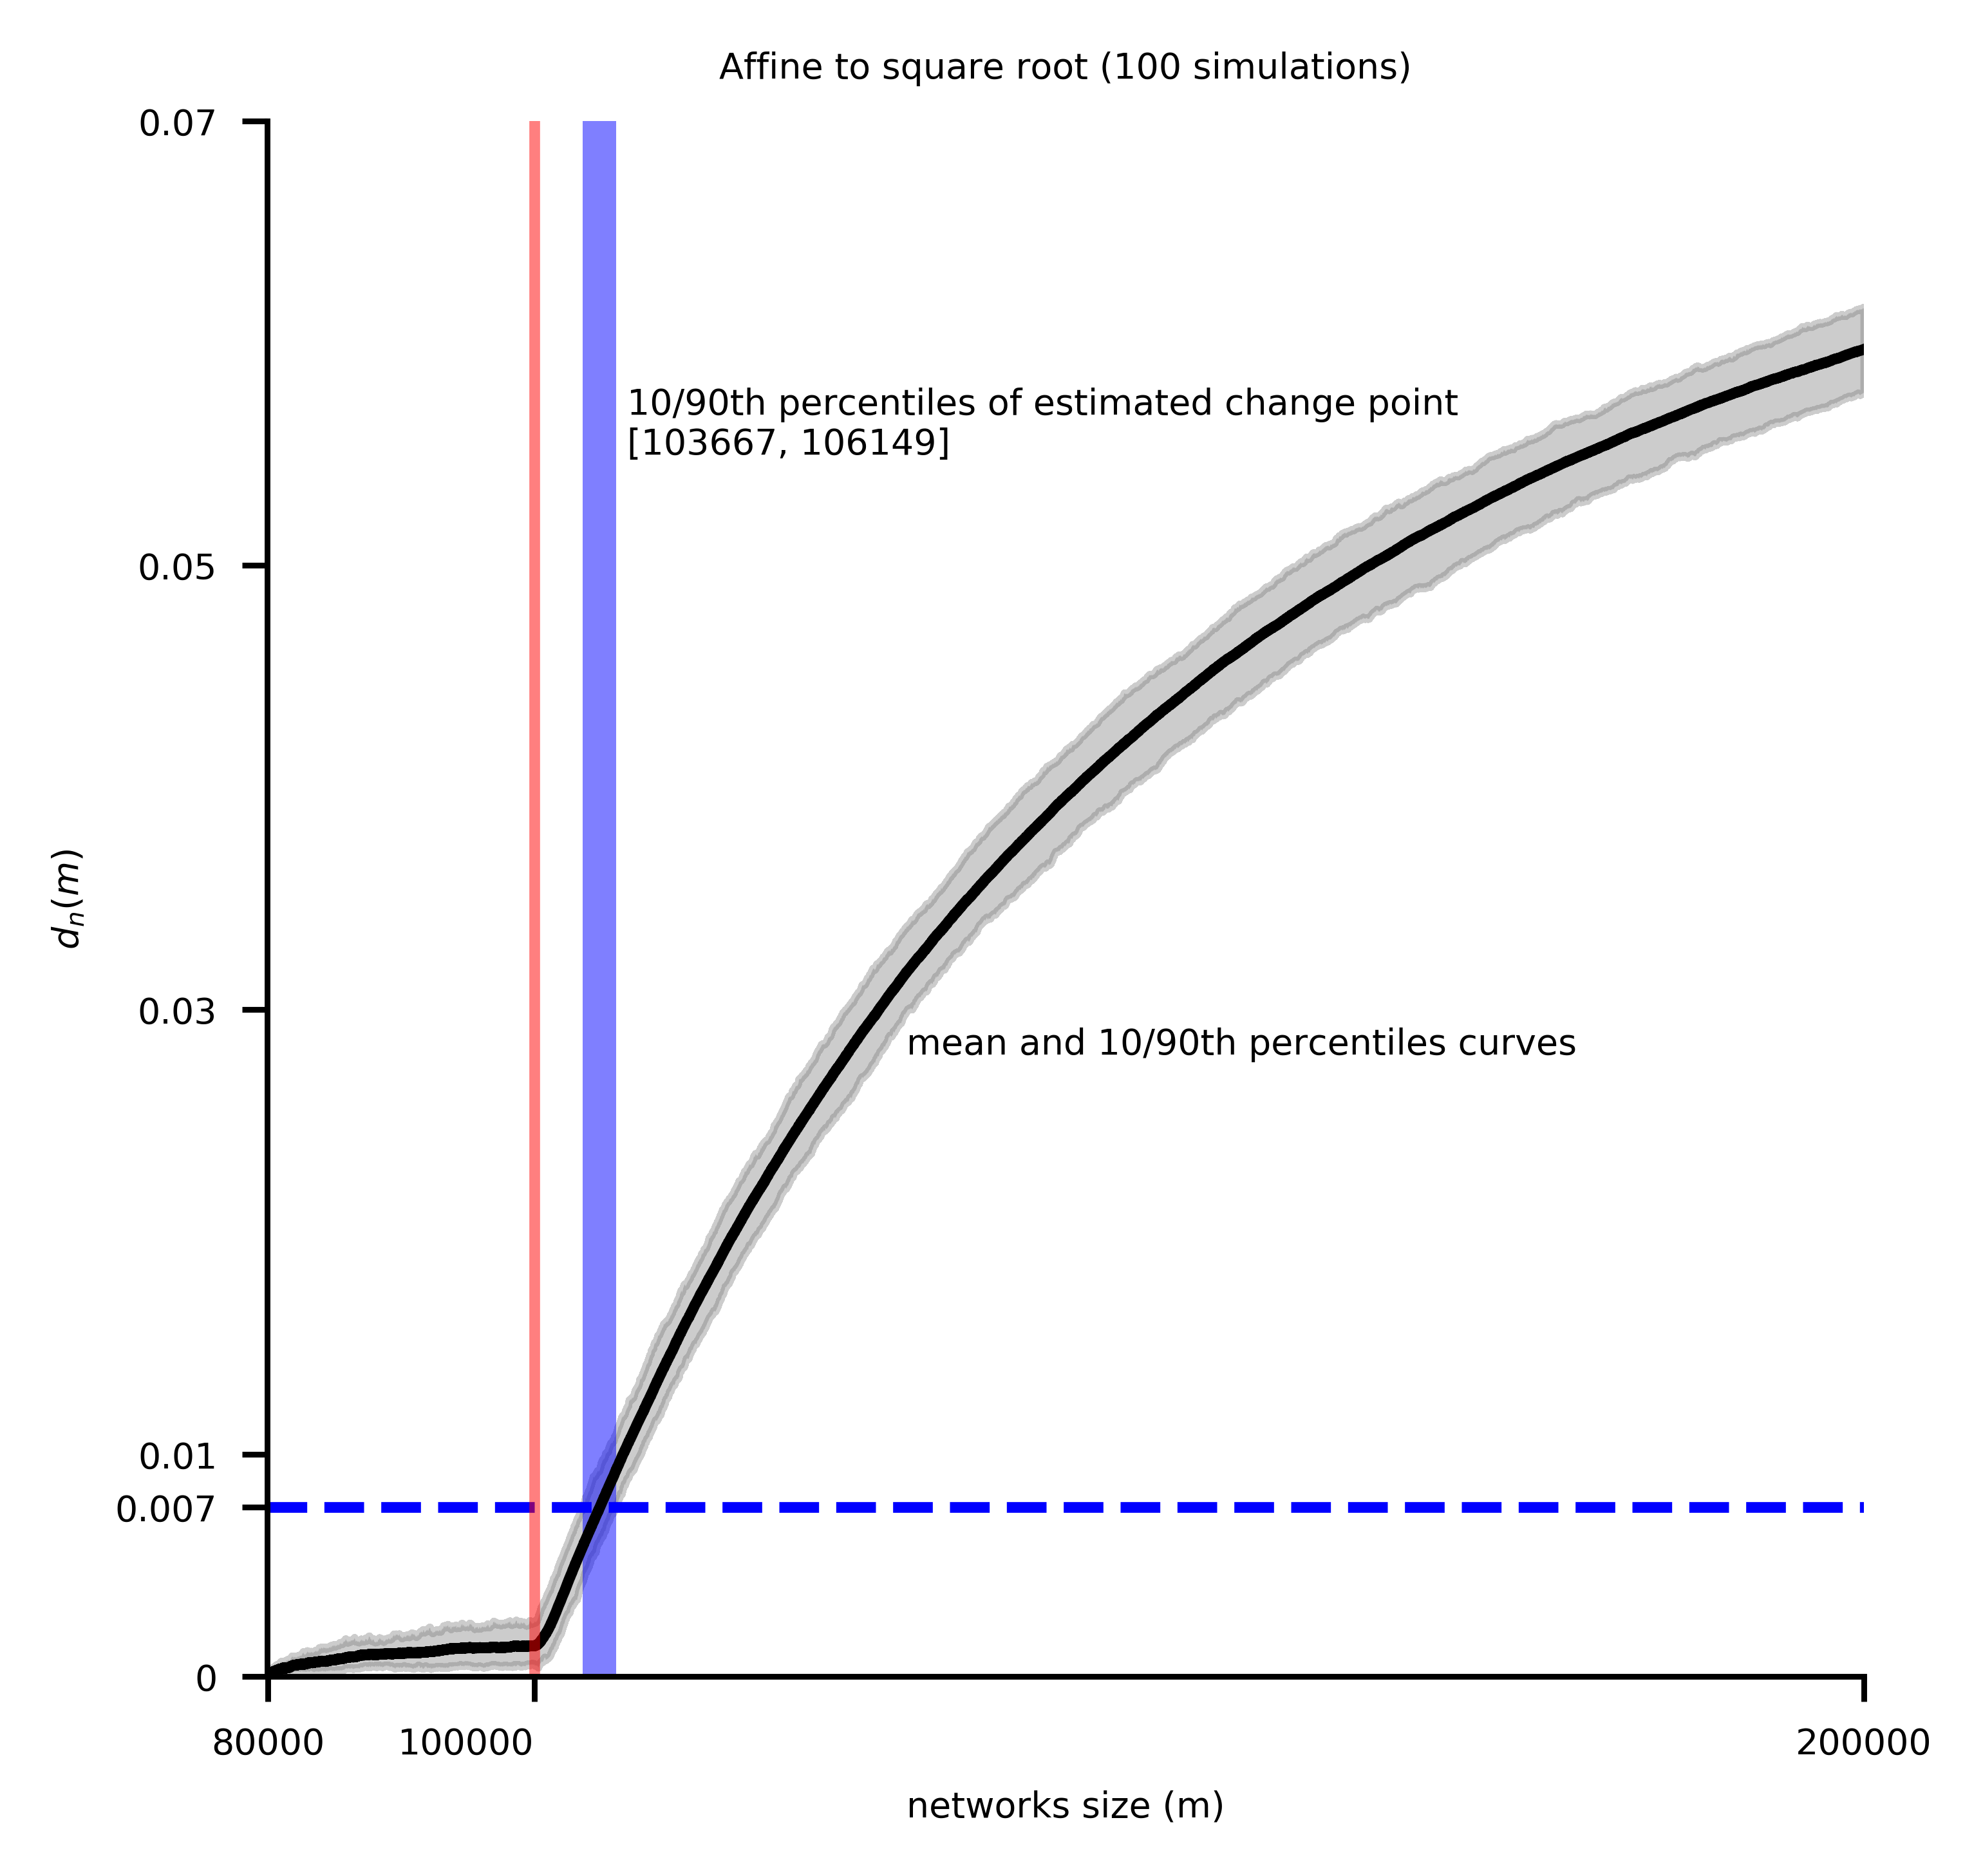

In [21]:

D = np.array(diff_stats)

mean_curve = np.mean(D, axis=0)
std_curve = np.std(D, axis=0)
percentile90 = np.percentile(D, q=90, axis=0)
percentile10 = np.percentile(D, q=10, axis=0)


cp_ests = np.apply_along_axis(estimate_change_point, 1, D)

cp10 = np.percentile(cp_ests, q=10, axis=0)
cp90 = np.percentile(cp_ests, q=90, axis=0)

fig = plt.figure(figsize=[4, 4], dpi=800)
ax = plt.axes()


plt.plot(mean_curve, color='black')
# plt.plot(percentile90, color='grey', alpha=.8)
# plt.plot(percentile10, color='grey', alpha=.8)
plt.fill_between(range(n), percentile10, percentile90, color='grey', alpha=.4, edgecolor=None)


plt.axhline(y=threshold, color='blue', label='threshold', linestyle='--')
plt.axvline(true_cp, label='true change point ({})'.format(true_cp), color='red', alpha=.5)

plt.axvspan(cp10, cp90, color='blue', alpha=.5, ec=None)

# x axis 
xticks = [80000, 100000, 200000]
plt.xticks(xticks, xticks, fontsize=fontsize)
ax.xaxis.get_majorticklabels()[1].set_horizontalalignment("right")
plt.xlim(xmin=anchor, xmax=n)
plt.xlabel('networks size (m)', fontsize=fontsize)

# y axis
yticks_labels = [0, float(str(threshold)[:5]), 0.01, 0.03, 0.05, 0.07]
yticks_pos = [0, threshold, 0.01, 0.03, 0.05, 0.07]
plt.yticks(yticks_pos, yticks_labels, fontsize=fontsize)
plt.ylim(ymin=0)
plt.ylabel('$d_n(m)$', fontsize=fontsize)

# kill top and right axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.text(107000, y=0.055, s='10/90th percentiles of estimated change point \n[{}, {}]'.format(int(cp10), int(cp90)), fontsize=fontsize)
ax.text(128000, y=0.028, s='mean and 10/90th percentiles curves', fontsize=fontsize)

plt.title('Affine to square root (100 simulations)', fontsize=fontsize)


# plt.savefig('summary_stat_affine_sqrt.png')